*Author: Nika Rasoolzadeh* - *Contact: nika.rasoolzadeh@gmail.com*

*Date: 16.12.2021*

# Exploring "The Office" TV Show Dataset

### Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import string
import json 
import nltk
from collections import Counter
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

### Getting the data

In [2]:
df = pd.read_csv("the_office_lines_scripts.csv")
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
df.shape

(59909, 7)

## Data Cleaning
Checking if the dataset has any missing or null values, and duplicated rows before starting the analysis.

In [4]:
df.isna().any()

id           False
season       False
episode      False
scene        False
line_text    False
speaker      False
deleted      False
dtype: bool

In [5]:
# Since Characters such as empty string are not considered NA value find if any exists by:
(df.applymap(lambda x: x == '')).any()

id           False
season       False
episode      False
scene        False
line_text    False
speaker      False
deleted      False
dtype: bool

In [6]:
print(f'There are {df.duplicated().sum()} duplicated rows in the dataset.')

There are 0 duplicated rows in the dataset.


In [7]:
# Finding the number of deleted scenes
df['deleted'].value_counts()

False    57973
True      1936
Name: deleted, dtype: int64

There are 1936 deleted scenes in the dataset so it's better to remove them first. By removing them the **id** column data may cause confusion so it's better to be removed as well.

In [8]:
dscenes = (df['deleted'] == True)
df.drop(index=df[dscenes].index, inplace=True) # Dropping the deleted scene rows
df.drop(['id', 'deleted'], axis=1, inplace=True) # Dropping id and deleted colmns
df.head()

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael


In [9]:
df.shape

(57973, 5)

The new dataframe has 57973 rows and 5 columns.

In [10]:
speakers = df['speaker'].unique()
speakers.size

786

There are **786** speakers in the aired scenes according to the dataset and their names are listed below. However, some of the character names are mentioned multiple times in formats like *Andy & Kerin*, there are also some misspellings like *Angelea*, *Angel*, *Angels*, and there are mutiple speakers like *All Girls*, *All the Men*. So to find the accurate character number first the speaker column should be filtered.

In [11]:
print(sorted(speakers)[:30])

["(Pam's mom) Heleen", '3rd Athlead Employee', '4th Athlead Employee', 'A.J.', 'AJ', 'Aaron Rodgers', 'Abby', 'Actor', 'Actress', 'Ad guy 1', 'Ad guy 2', 'Air Force recruiter', 'Alan', 'Albiny', 'Alex', 'Alice', 'All', 'All Girls', 'All but Oscar', 'All the Men', 'Alonzo', 'Amanda', 'Amy', 'Andy', 'Andy & Erin', 'Andy & Michael', 'Andy & Walter', 'Andy and Darryl', 'Andy and Dwight', 'Andy and Erin']


#### Correcting the misspellings in the Speaker Column:

In [12]:
df['speaker'].replace(['abe'],"Gabe",inplace=True)
df['speaker'].replace(['Angel','Angels','Anglea'], "Angela", inplace=True)
df['speaker'].replace(['AJ'], "A.J.", inplace=True)
df['speaker'].replace(['Barbara'], "Barbara Allen", inplace=True)
df['speaker'].replace(['Ben'], "Ben Franklin", inplace=True)
df['speaker'].replace(['Billy'], "Billy Merchant", inplace=True)
df['speaker'].replace(['Bob', 'Bob Vance, Vance Refrigeration'], "Bob Vance", inplace=True)
df['speaker'].replace(['CPR trainer'] , "CPR Trainer",inplace=True)
df['speaker'].replace(['CameraMan'], "Cameraman", inplace=True)
df['speaker'].replace(['Carol', 'Carrol', 'Carroll'] , "Carol Stills",inplace=True)
df['speaker'].replace(['Casey'] , "Casey Dean",inplace=True)
df['speaker'].replace(['Chares','Charles'], "Charles Miner", inplace=True)
df['speaker'].replace(['Co-worker #2'], "Co-worker-2", inplace=True)
df['speaker'].replace(['Concierge'] ,"Concierge Marie",inplace=True)
df['speaker'].replace(['Dacvid Walalce', 'Dacvid Wallace','David','David Wallcve'],"David Wallace",inplace=True)
df['speaker'].replace(['Dan'] ,"Dan Gore",inplace=True)
df['speaker'].replace(['Darrly', 'Darry', 'Daryl'], "Darryl", inplace=True)
df['speaker'].replace(['DeAngelo', 'DeAgnelo', 'Deangelo','Denagelo'],"Deangelo Vickers",inplace=True)
df['speaker'].replace(['DeliveryMan', 'Delivery man'] ,"Deliveryman",inplace=True)
df['speaker'].replace(['Denise'] ,"Dennis",inplace=True)
df['speaker'].replace(['Diane'] ,"Diane Kelly",inplace=True)
df['speaker'].replace(['D','Dwight ','Dight','Dwight [on phone]', 'Dwight.', 'Dwight:','DwightKSchrute'],"Dwight",inplace=True)
df['speaker'].replace(['Doug [church member]'] ,"Doug",inplace=True)
df['speaker'].replace(['DunMiff/sys'] ,"DunMiffsys",inplace=True)
df['speaker'].replace(["Erin's Cell Phone",'Erin'] ,"Erin Hannon",inplace=True)
df['speaker'].replace(['Female church member [to Michael]'] , "Female church member", inplace=True)
df['speaker'].replace(['Female intern'] ,"Female Intern",inplace=True)
df['speaker'].replace(['Fred'] ,"Fred Henry",inplace=True)
df['speaker'].replace(['Glen'] ,"Glenn",inplace=True)
df['speaker'].replace(['Group: Dunder Mifflin!\nAndy: Andy Bernard presents: Summer Softball Epic Fails! [Kevin swings bat on screen, fart noise follows] Fail. [repeats] Fail',"[Clark and Pete are shown on screen]\nVideo Andy: Hey, I'm Pete, puberty is such a drag, man. And I'm Clark! I like to eat toilet paper. [Clark and Pete wave at camera] We fail! [Video shows memorial of Jerry", '[repeats]\nAndy: Fail'] ,"Andy",inplace=True)
df['speaker'].replace(['Guy at bar'] ,"Guy At Bar",inplace=True)
df['speaker'].replace(['Gym instructor'] ,"Gym Instructor",inplace=True)
df['speaker'].replace(['Hank','Hank [the security guard]', 'Hank the Security Guard'], "Hank Doyle", inplace=True)
df['speaker'].replace(["(Pam's mom) Heleen","Pam's Mom",'Helen',"Pam's mom"], "Helene", inplace=True)
df['speaker'].replace(['Holy'], "Holly", inplace=True)
df['speaker'].replace(['Isabelle'], "Isabel", inplace=True)
df['speaker'].replace(['JIM9334'] ,"JIM9334 [screen name]",inplace=True)
df['speaker'].replace(['JIm',"Jim's voicemail"], "Jim", inplace=True)
df['speaker'].replace(['Jakey'], "Jake", inplace=True)
df['speaker'].replace(['Jan [on phone]'], "Jan", inplace=True)
df['speaker'].replace(['Jo'], "Jo Bennett", inplace=True)
df['speaker'].replace(['Julius'], "Julius Irving", inplace=True)
df['speaker'].replace(['Justin'], "Justine", inplace=True)
df['speaker'].replace(['Kathy'], "Cathy", inplace=True)
df['speaker'].replace(['Larry Myers'], "Larry", inplace=True)
df['speaker'].replace(['Lonnie'], "Lonny", inplace=True)
df['speaker'].replace(['Man on phone'], "Man on Phone", inplace=True)
df['speaker'].replace(['Mee-Maw','Mema'],"MeeMaw",inplace=True)
df['speaker'].replace(['Meridith'],"Meredith",inplace=True)
df['speaker'].replace(['Merv'], "Merv Bronte", inplace=True)
df['speaker'].replace(['M ichael', 'MIchael','Micael', 'Micahel', 'Michae', 'Michael ', 'Michael [on phone]', 'Michal', 'Micheal', 'Michel', 'Mihael', 'Miichael','Video Michael'],"Michael",inplace=True)
df['speaker'].replace(['Cousin Mose','Mose [on phone]'], "Mose", inplace=True)
df['speaker'].replace(['Mr. Kapoor'], "Kelly's Father", inplace=True)
df['speaker'].replace(['Mrs. Kapoor'], "Kelly's Mom", inplace=True)
df['speaker'].replace(['Nellie'], "Nellie Bertram", inplace=True)
df['speaker'].replace(['Old lady'], "Old Lady", inplace=True)
df['speaker'].replace(["Oscar's Computer","Oscar's voice from the computer"], "Oscar", inplace=True)
df['speaker'].replace(['Todd','Packer','Sweeney Todd'],"Todd Packer",inplace=True)
df['speaker'].replace(['Pam ', 'Pam [on phone]', 'Pam as fourth-biggest client', 'Pam as ninth-biggest client'],"Pam",inplace=True)
df['speaker'].replace(['Paul'],"Paul Faust",inplace=True)
df['speaker'].replace(['Phil'],"Phil Maguire",inplace=True)
df['speaker'].replace(['Phylis', 'Phyliss'], "Phyllis",inplace=True)
df['speaker'].replace(['Promo Voice'], "Promo Announcer",inplace=True)
df['speaker'].replace(['Receptionitis15'], "Receptionitis15 [screen name]", inplace=True)
df['speaker'].replace(['Robert'],"Robert California",inplace=True)
df['speaker'].replace(['Rolph'],"Rolf" ,inplace=True)
df['speaker'].replace(['Ryan',"Ryan's Voicemail"],"Ryan Howard",inplace=True)
df['speaker'].replace(['Ira','Sensei'],"Sensei Ira" ,inplace=True)
df['speaker'].replace(['Senator', 'Senator Liptop'],"Senator Lipton",inplace=True) 
df['speaker'].replace(['Stanely'], "Stanley",inplace=True)
df['speaker'].replace(['Tom'],"Tom Halpert",inplace=True) 
df['speaker'].replace(['Teddy'],"Teddy Wallace",inplace=True) 
df['speaker'].replace(['Vance Refrigeration guy'],"Vance Refrigeration Guy",inplace=True) 
df['speaker'].replace(['Walter Jr'],"Walter Jr.",inplace=True)
df['speaker'].replace(['Warehouse worker'],"Warehouse Worker",inplace=True)
df['speaker'].replace(['Warren'],"Warren Buffet",inplace=True) 
df['speaker'].replace(["[Clark and Pete are shown on screen]\nVideo Andy: Hey, I'm Pete, puberty is such a drag, man. And I'm Clark! I like to eat toilet paper. [Clark and Pete wave at camera] We fail! [Video shows memorial of Jerry"
],"Video",inplace=True)
df['speaker'].replace(["[repeats]\nAndy: Fail",'sAndy'],"Andy",inplace=True)
df['speaker'].replace(['song'],"Song",inplace=True)

To find the rows with multiple speakers the column can be searched for the word *and* in the speaker name strings. There are 77 of such instance.

In [13]:
and_cases = df['speaker'].str.contains("and ", na=False, case=True)
filtered_df = df[~and_cases]

There are also speaker names with **&** inside. So they need to be filtered as well.

In [15]:
cap_and = filtered_df['speaker'].str.contains("& ", na=False, case=True)
filtered_df = filtered_df[~cap_and]

And there are 9 instances of speaker names combined with a slash. Those need to be dropped too.

In [16]:
# Filtering out the speaker names with /
slash_cases = filtered_df['speaker'].str.contains("/", na=False)
filtered_df = filtered_df[~slash_cases]
filtered_df['speaker'].nunique()

589

After filtering the names the number of characters are reduced from **786** to **589** including the group speakers like *All*, *Workers*, etc. Their names are listed below.

In [17]:
filt_sp = filtered_df['speaker'].unique()
print(sorted(filt_sp))

['3rd Athlead Employee', '4th Athlead Employee', 'A.J.', 'Aaron Rodgers', 'Abby', 'Actor', 'Actress', 'Ad guy 1', 'Ad guy 2', 'Air Force recruiter', 'Alan', 'Albiny', 'Alex', 'Alice', 'All', 'All Girls', 'All but Oscar', 'All the Men', 'Alonzo', 'Amanda', 'Amy', 'Andy', 'Andy, Creed, Kevin, Kelly', 'Andy, Creed, Kevin, Kelly, Darryl', 'Angela', 'Announcer', 'Another guy', 'Archivist', 'Artist', 'Astrid', 'Athlead Coworker', 'Athlead Employee', 'Attendant', 'Audience', 'Aunt Shirley', 'Automated phone voice', 'Ballerinas', 'Bar Manager', 'Barbara Allen', 'Bartender', 'Bass Player', 'Ben Franklin', 'Bert', 'Beth', 'Bill', 'Bill Cress', 'Bill Hader', 'Billy Merchant', "Billy's Girlfriend", 'Blogger', 'Blogger 2', 'Blonde', 'Blood Drive Worker', 'Blood Girl', 'Boat Guy', 'Bob Vance', "Bob's Secretary", 'Bookstore employee', 'Boom Box', 'Both', 'Bouncer', 'Brad', 'Brandon', 'Brenda', 'Brian', 'Broccoli Rob', 'Bruce', 'Bus driver', 'Business Student #1', 'Business Student #2', 'Business Stud

#### Character with the Most Lines:
The character with the most lines is **Michael** followed by **Dwight**, **Jim**, **Pam**, and **Andy**.

In [18]:
totline = filtered_df['speaker'].value_counts()
totline.head(5)

Michael    11612
Dwight      7177
Jim         6613
Pam         5215
Andy        3972
Name: speaker, dtype: int64

## Natural Language Processing
First the punctuations then the stopwords are removed and a tokenized column of the lines spoken is created.

In [19]:
# Removing Punctutaion
def remove_punctuation(line_text):
    no_punct="".join([words for words in line_text if words not in string.punctuation])
    return no_punct
    
filtered_df['line_text'] = filtered_df['line_text'].apply(lambda x: remove_punctuation(x))
filtered_df['line_text'].head()

0    All right Jim Your quarterlies look very good ...
1                  Oh I told you I couldnt close it So
2    So youve come to the master for guidance Is th...
3              Actually you called me in here but yeah
4          All right Well let me show you how its done
Name: line_text, dtype: object

After examining the lines a certain symbol is observed in the lines that should also be removed.

In [20]:
# Replace the symbol with space
filtered_df['line_text'] = filtered_df['line_text'].str.replace('���', " ")
print('Does the symbol exist?:','���' in filtered_df['line_text'])

Does the symbol exist?: False


In [21]:
def remove_stopwprds(line_text):
    # Returns the tokenized list of the text line inputted
    filtered_sentence = [word for word in line_text.split() if word.lower() not in stop_words]
    return filtered_sentence

# Reading from the stopjson file
with open('stopwords.json', 'r') as openfile:
    stop_words = json.load(openfile)

filtered_df['token'] = filtered_df['line_text'].apply(lambda x: remove_stopwprds(x)) # remove the stopwords  
filtered_df['word_num'] = filtered_df['token'].apply(lambda x: len(x)) # get the word number for each line

filtered_df.head()

,season,episode,scene,line_text,speaker,token,word_num
0,1,1,1,All right Jim Your quarterlies look very good ...,Michael,"[Jim, quarterlies, good, things, library]",5
1,1,1,1,Oh I told you I couldnt close it So,Jim,"[told, close]",2
2,1,1,1,So youve come to the master for guidance Is th...,Michael,"[youve, master, guidance, grasshopper]",4
3,1,1,1,Actually you called me in here but yeah,Jim,"[called, yeah]",2
4,1,1,1,All right Well let me show you how its done,Michael,[],0


### Average of Words per Line for Each Character

In [23]:
characters = filtered_df['speaker'].value_counts().keys().to_list() # Character names in a list

def sum_words(person):
    # Returns the total number of words spoken by a character
    return filtered_df.loc[filtered_df['speaker'] == person, 'word_num'].sum()

totwords_eachCharacter = [] # Total number of words spoken by each character
for person in characters:
    totwords_eachCharacter.append(sum_words(person))

totline_eachCharacter = totline.to_list() # Total number of lines for each character in a list

#average of words per line for each character:
avgword_eachCharacter = [ round(x/totline_eachCharacter[idx]) for idx,x in enumerate(totwords_eachCharacter)] 
pd.DataFrame({'Speaker' : characters, 'Average Word' : avgword_eachCharacter})

,Speaker,Average Word
0,Michael,5.0
1,Dwight,5.0
2,Jim,3.0
3,Pam,3.0
4,Andy,5.0
...,...,...
584,Woman 1,14.0
585,Guy buying doll,3.0
586,HCT Member #1,1.0
587,Man 1,4.0


### Most Common Word per Character

In [24]:
def total_tokens(person):
    # Returns the list of all words per character

    wrdlist = filtered_df.loc[filtered_df['speaker'] == person, 'token'].tolist() 
    words = []
    for elem in wrdlist:
        for w in elem:
            words.append(w) 
    
    return words

mcdict = {'speaker':[] , 'most_common': []}  # Most common dict
for i in characters:
    mcdict['speaker'].append(i)
    character_words = total_tokens(i)

    word_freq = nltk.FreqDist(w for w in character_words)
    mostcommont= word_freq.most_common()  ## here you can limit the number of common words
    mcdict['most_common'].append(mostcommont)

Most Common words and their counts for each character are like below. For example the most common word Michael uses is **don't**, he've said it 917 times. Pam's most common word is **Michael** repeated 333 times, etc.

In [25]:
mcdf = pd.DataFrame.from_dict(mcdict) 
mcdf.head(10)

,speaker,most_common
0,Michael,"[(dont, 917), (Dwight, 538), (good, 490), (Yea..."
1,Dwight,"[(Jim, 419), (Michael, 377), (dont, 259), (Dwi..."
2,Jim,"[(Dwight, 368), (Pam, 324), (dont, 315), (Yeah..."
3,Pam,"[(Michael, 333), (dont, 308), (Jim, 303), (Yea..."
4,Andy,"[(Yeah, 246), (dont, 160), (Hey, 140), (gonna,..."
5,Kevin,"[(Yeah, 113), (Michael, 87), (Oscar, 51), (Hey..."
6,Angela,"[(Dwight, 111), (dont, 91), (Kevin, 53), (Pam,..."
7,Erin Hannon,"[(Andy, 126), (dont, 75), (Yeah, 61), (Hey, 53..."
8,Oscar,"[(Michael, 81), (dont, 65), (Kevin, 55), (Ange..."
9,Ryan Howard,"[(dont, 92), (Yeah, 81), (Michael, 65), (Hey, ..."


### Number of Episodes a Character Does Not Have Line

In [26]:
totep_num = df.groupby('season')['episode'].nunique().sum() #Getting total number of episodes
# Sort the character appearance to once per scene 
ep_df = filtered_df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','speaker'],keep='first')
in_ep = ep_df['speaker'].value_counts() # Number of episodes each character has a line
no_ep = totep_num - in_ep
no_ep = no_ep.reset_index().rename(columns={"index": 'speaker', "speaker": "num_of_ep"})
no_ep.head(14)

,speaker,num_of_ep
0,Dwight,0
1,Jim,1
2,Pam,4
3,Kevin,6
4,Angela,12
5,Stanley,16
6,Phyllis,17
7,Oscar,22
8,Andy,42
9,Ryan Howard,44


As the table above shows, **Dwight** has appeared in all episodes, **Jim** does not have a line in only one episode, and etc. **Michael** does not have a line in 49 episodes which is compatible with the fact he left the show after season 7.

### "That's What She Said" Joke:
There are totally 40 times *That's what she* statement appears in the lines however one of them is not in reference to the joke.

In [27]:
joke = filtered_df['line_text'].str.contains("Thats what she", na=False, case=False)
joke_instances = filtered_df[joke]
joke_instances.shape

(40, 7)

In [28]:
joke_instances['line_text'][28974]

'People turn to their families all the time when they need help starting out and if my Nanas investment club can help the Michael Scott Paper Company become a reality then Im sure thats what she would have wanted Does want'

After removing this row, there will be 39 times the joke appears.

In [29]:
joke_instances.drop([28974], inplace=True)
joke_instances.head(5)

,season,episode,scene,line_text,speaker,token,word_num
2544,2,2,24,Thats what she said Pam,Michael,[Pam],1
2546,2,2,24,Thats what she sai clears throat Nope but Oka...,Michael,"[sai, clears, throat, Nope, suit]",5
2590,2,2,34,Does that include Thats What She Said,Jim,[include],1
2593,2,2,34,THATS WHAT SHE SAID,Michael,[],0
5324,2,10,2,A thats what she said and B I wanted it to be ...,Michael,"[wanted, impressive, biggest, day, year, deser...",9


### Average Percent of Lines for Each Character per Episode and Seasons

In [30]:
totlines = filtered_df['speaker'].value_counts().sum()
#percentage of lines spoken overall
avg_percent = (filtered_df.groupby(['season','episode'])['speaker'].value_counts()/totlines)*100
avg_percent = avg_percent.to_frame(name='Average Percent').reset_index()
avg_percent

,season,episode,speaker,Average Percent
0,1,1,Michael,0.141758
1,1,1,Pam,0.070879
2,1,1,Jim,0.062235
3,1,1,Dwight,0.050134
4,1,1,Jan,0.020745
...,...,...,...,...
3865,9,23,Photographer,0.001729
3866,9,23,Usher,0.001729
3867,9,23,Woman,0.001729
3868,9,23,Woman 1,0.001729


### The Most Common Word Used in The Show:
It is **don't** with a total count of 3139 times. The top 10 most used words are listed below.

In [31]:
alltokens = filtered_df.token.tolist()
words = []
for elem in alltokens:
    for w in elem:
        words.append(w)

word_freq = nltk.FreqDist(w for w in words)
overall_common= word_freq.most_common()
overall_common[:10]

[('dont', 3139),
 ('Yeah', 2556),
 ('Michael', 2534),
 ('Dwight', 2046),
 ('Hey', 2021),
 ('Jim', 1856),
 ('Pam', 1535),
 ('good', 1525),
 ('gonna', 1471),
 ('time', 1194)]

### Total Number of Scenes per Episode and Season

In [32]:
totscenes = filtered_df.groupby(['season','episode'])['scene'].count().to_frame()
totscenes.reset_index()

,season,episode,scene
0,1,1,229
1,1,2,217
2,1,3,244
3,1,4,265
4,1,5,234
...,...,...,...
181,9,19,273
182,9,20,234
183,9,21,382
184,9,22,497


### The Total Line Contribution Percentage of Each Character:
Michael's line contribute around 20% to the overall lines, Dwight's 12.4%, etc.

In [41]:
tl = ((filtered_df['speaker'].value_counts()/filtered_df['speaker'].value_counts().sum())*100).to_frame()
tl.reset_index().rename(columns={'index':'speaker','speaker':'line percentage'})

,speaker,line percentage
0,Michael,20.074337
1,Dwight,12.407295
2,Jim,11.432276
3,Pam,9.015472
4,Andy,6.866626
...,...,...
584,Woman 1,0.001729
585,Guy buying doll,0.001729
586,HCT Member #1,0.001729
587,Man 1,0.001729


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E7512D0>],
      dtype=object)

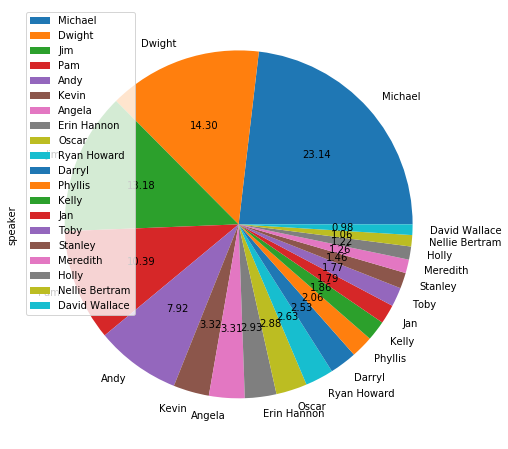

In [42]:
tl.head(20).plot.pie(subplots=True, figsize=(8,8),autopct='%.2f')